In [3]:
pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.5 MB 825.8 kB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.5 MB 1.5 MB/s eta 0:00:01
     ---------- ----------------------------- 0.4/1.5 MB 2.3 MB/s eta 0:00:01
     ------------- -------------------------- 0.5/1.5 MB 2.4 MB/s eta 0:00:01
     ---------------- ----------------------- 0.6/1.5 MB 2.3 MB/s eta 0:00:01
     --------------------- ------------------ 0.8/1.5 MB 2.5 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.5 MB 2.9 MB/s eta 0:00:01
     --------------------------------- ------ 1.3/1.5 MB 3.1 MB/s eta 0:00:01
     -------------------------------------- - 1.4/1.5 MB 3.3 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/269.5 kB ? eta -:--:--
   

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DIVYA\AppData\Roaming\nltk_data...


In [8]:
data = pd.read_csv("C:/Users/DIVYA/Downloads/amazon_reviews/amazon_reviews.csv")

In [9]:
print(data.head())

   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

In [10]:
print(data.describe())

        Unnamed: 0      overall     day_diff  helpful_yes   helpful_no  \
count  4915.000000  4915.000000  4915.000000  4915.000000  4915.000000   
mean   2457.000000     4.587589   437.367040     1.311089     0.210376   
std    1418.982617     0.996845   209.439871    41.619161     4.023296   
min       0.000000     1.000000     1.000000     0.000000     0.000000   
25%    1228.500000     5.000000   281.000000     0.000000     0.000000   
50%    2457.000000     5.000000   431.000000     0.000000     0.000000   
75%    3685.500000     5.000000   601.000000     0.000000     0.000000   
max    4914.000000     5.000000  1064.000000  1952.000000   183.000000   

        total_vote  score_pos_neg_diff  score_average_rating  \
count  4915.000000         4915.000000           4915.000000   
mean      1.521465            1.100712              0.075468   
std      44.123095           39.367949              0.256062   
min       0.000000         -130.000000              0.000000   
25%       0.0

In [11]:
data = data.dropna()

In [15]:
print(data.head())

   Unnamed: 0  reviewerName  overall  \
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   
5           5       2Cents!      5.0   

                                          reviewText  reviewTime  day_diff  \
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   
5  It's mini storage.  It doesn't do anything els...  2013-04-29       588   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0                   0   
4            0           0           0    

In [21]:
data.rename(columns={'overall': 'Score'}, inplace= True)

In [22]:
ratings = data["Score"].value_counts()

In [23]:
print(ratings)

5.0    3921
4.0     526
1.0     244
3.0     142
2.0      80
Name: Score, dtype: int64


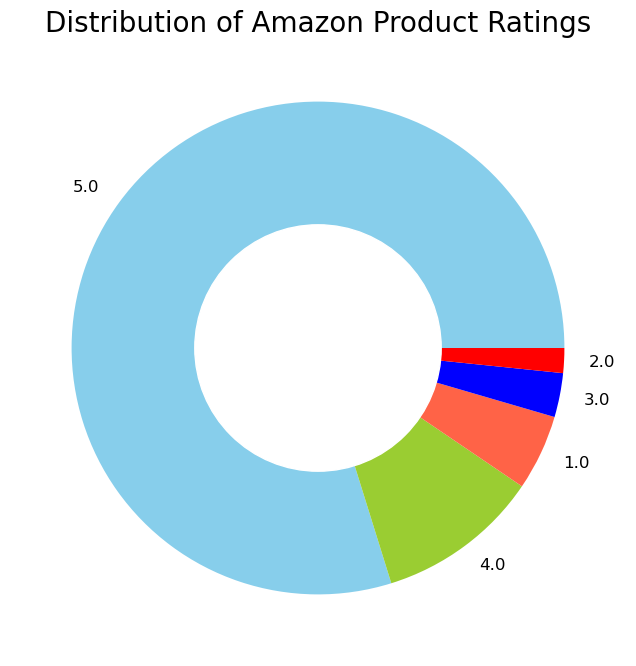

In [24]:
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [26]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["reviewText"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["reviewText"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["reviewText"]]
print(data.head())

   Unnamed: 0  reviewerName  Score  \
1           1          0mie    5.0   
2           2           1K3    4.0   
3           3           1m2    5.0   
4           4  2&amp;1/2Men    5.0   
5           5       2Cents!    5.0   

                                          reviewText  reviewTime  day_diff  \
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   
5  It's mini storage.  It doesn't do anything els...  2013-04-29       588   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0                   0   
4            0           0           0                

In [27]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
#So, most people are neutral when submitting their experiences with the products they have purchased from Amazon. 
#Now let’s see the total of all sentiment scores:

In [29]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  765.5469999999979
Negative:  219.70400000000006
Neutral:  3927.775999999992


In [ ]:
#So we can say that most of the reviews of the products available on Amazon are positive,
#as the total sentiment scores of Positive and Neural are much higher than Negative scores.